# Medical insurance

- importing libraries
- load the data
- clean the data(null,duplicates)
- processing(encoding,scalling)
- split data
- create and train model 
- test and model
- evaluation

# importing libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
md=pd.read_csv(r"C:\Users\Bhoomika.G\OneDrive\Documents\insurance.csv")
md.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
md.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
md.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [11]:
md.drop_duplicates(inplace=True)
md.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [13]:
se=LabelEncoder()
md['sex_encoder']=se.fit_transform(md['sex'])
#encoder education level
se1=LabelEncoder()
md['smoker_encoder']=se1.fit_transform(md['smoker'])
se2=LabelEncoder()
md['region_encoder']=se2.fit_transform(md['region'])
md.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoder,smoker_encoder,region_encoder
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


# split the data(ind,dep)

In [15]:
x = md[['age','sex_encoder','bmi','children','smoker_encoder','region_encoder']]
y=md['charges']


#  split the train and test

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# creating models

In [19]:
crg_model= LinearRegression()
crg_model.fit(x_train,y_train)

LinearRegression()

In [20]:
a=int(input("enter the your age"))
g_user=input("enter the gendre")
bmi=int(input("enter the bmi"))
child=int(input("enter the children "))
smok=input("enter the smoker")
region=input("enter the region")


enter the your age 20
enter the gendre male
enter the bmi 35
enter the children  4
enter the smoker yes
enter the region southwest


In [21]:
gen_enc=se.transform([g_user])[0]
smk_enc=se1.transform([smok])[0]
reg_enc=se2.transform([region])[0]
print(gen_enc,smk_enc,reg_enc)

1 1 3


In [22]:
result=crg_model.predict([[a,gen_enc,bmi,child,smk_enc,reg_enc]]) 
print(result)

[29244.97685552]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Evalution:
- predict test value
- visulaize
- matrics

In [24]:
model_prediction=crg_model.predict(x_test)

In [25]:
len(y_test)

268

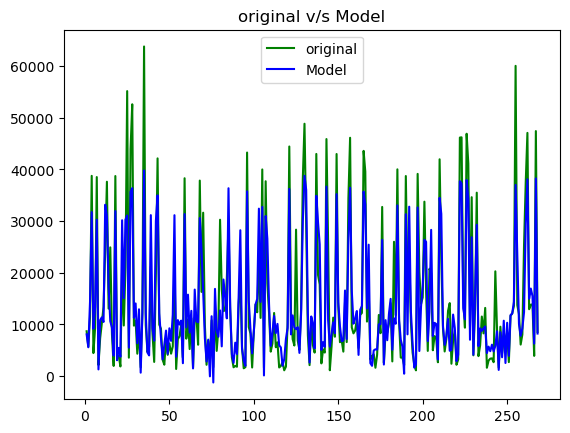

In [28]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,269),y_test,label="original",color='green')
#plotting the line graph for model values
plt.plot(np.arange(1,269),model_prediction,label='Model',color='blue')
plt.title('original v/s Model')
plt.legend()
plt.show()

In [29]:
r2score=r2_score(y_test,model_prediction)  #
print(r2score)
if r2score >0.5:
    print("model is good fit")
else:
    print("mode id not good fit")

0.8068466322629111
model is good fit


# MSE

In [30]:
mse=mean_squared_error(y_test,model_prediction)
print(mse)

35493102.61165053


# MAE

In [31]:
mae=mean_absolute_error(y_test,model_prediction)
print(mae)

4182.353155288298
